In [2]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sb

In [3]:
sb.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [13]:
df=sb.load_dataset('taxis')
df=df.head(30)
df

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.00,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.00,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.00,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.00,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.00,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan
5,2019-03-11 10:37:23,2019-03-11 10:47:31,1,0.49,7.5,2.16,0.00,12.96,yellow,credit card,Times Sq/Theatre District,Midtown East,Manhattan,Manhattan
6,2019-03-26 21:07:31,2019-03-26 21:17:29,1,3.65,13.0,2.00,0.00,18.80,yellow,credit card,Battery Park City,Two Bridges/Seward Park,Manhattan,Manhattan
7,2019-03-22 12:47:13,2019-03-22 12:58:17,0,1.40,8.5,0.00,0.00,11.80,yellow,NaN,Murray Hill,Flatiron,Manhattan,Manhattan
8,2019-03-23 11:48:50,2019-03-23 12:06:14,1,3.63,15.0,1.00,0.00,19.30,yellow,credit card,East Harlem South,Midtown Center,Manhattan,Manhattan
9,2019-03-08 16:18:37,2019-03-08 16:26:57,1,1.52,8.0,1.00,0.00,13.30,yellow,credit card,Lincoln Square East,Central Park,Manhattan,Manhattan


In [14]:
x=df.iloc[:,4]
x=list(x)
y=df.iloc[:,5]
y=list(y)
print(x)
print(y)
data=list(zip(x,y))
data

[7.0, 5.0, 7.5, 27.0, 9.0, 7.5, 13.0, 8.5, 15.0, 8.0, 17.0, 6.5, 6.5, 10.5, 11.5, 13.5, 13.0, 10.5, 9.5, 6.5, 6.5, 5.5, 31.5, 8.5, 9.5, 10.0, 13.5, 12.5, 17.5, 12.0]
[2.15, 0.0, 2.36, 6.15, 1.1, 2.16, 2.0, 0.0, 1.0, 1.0, 0.0, 2.16, 1.0, 0.0, 0.0, 0.0, 0.0, 2.0, 1.92, 1.08, 1.54, 2.3, 8.31, 2.36, 3.84, 3.0, 0.0, 3.26, 0.0, 0.0]


[(7.0, 2.15),
 (5.0, 0.0),
 (7.5, 2.36),
 (27.0, 6.15),
 (9.0, 1.1),
 (7.5, 2.16),
 (13.0, 2.0),
 (8.5, 0.0),
 (15.0, 1.0),
 (8.0, 1.0),
 (17.0, 0.0),
 (6.5, 2.16),
 (6.5, 1.0),
 (10.5, 0.0),
 (11.5, 0.0),
 (13.5, 0.0),
 (13.0, 0.0),
 (10.5, 2.0),
 (9.5, 1.92),
 (6.5, 1.08),
 (6.5, 1.54),
 (5.5, 2.3),
 (31.5, 8.31),
 (8.5, 2.36),
 (9.5, 3.84),
 (10.0, 3.0),
 (13.5, 0.0),
 (12.5, 3.26),
 (17.5, 0.0),
 (12.0, 0.0)]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


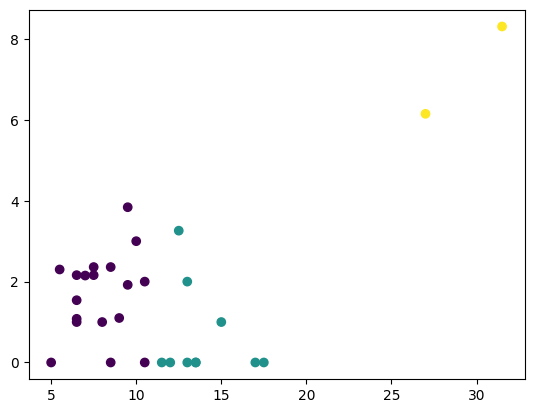

In [17]:
k = KMeans(n_clusters=3)
k.fit(data)

plt.scatter(x, y, c=k.labels_)
plt.show()